# LOGISTIC REGRESSION

To delve deeper into logistic regression using a simple dataset with two observations, where each observation has two features and corresponding labels, let's construct a hypothetical example. We will follow this with an explanation of how logistic regression works with this dataset.

### Hypothetical Dataset

Consider a dataset with two observations, each with two features. Let's also assume we have binary labels for these observations, indicating two classes: 0 or 1.

| $x_1$ | $x_2$ | $y$ |
|-------|-------|-----|
| 2     | 3     | 0   |
| 4     | 1     | 1   |


### Logistic Regression Overview

Logistic regression aims to model the probability that a given input point belongs to a certain class. The probability of the outcome being in class '1' is modeled as a logistic function of a linear combination of the input features.

### Model Representation

The logistic model predicts the probability ($P$) that $Y=1$ for a given set of input features $X$. This is represented as:

$P(Y=1|X) = \frac{1}{1 + e^{-(\theta_0 + \theta_1 x_1 + \theta_2 x_2)}}$

Here, $\theta_0$, $\theta_1$, and $\theta_2$ are the parameters of the model that we need to learn from the training data. $x_1$ and $x_2$ are the input features.

### Learning Model Parameters

The parameters $\theta_0$, $\theta_1$, and $\theta_2$ are learned during the training process, where the model uses the known labels of the training data to adjust these parameters to predict the labels as accurately as possible. The learning process involves minimizing a cost function, typically using methods like gradient descent. The cost function for logistic regression is usually the binary cross-entropy, also known as the log loss.

### Making Predictions

Once the model parameters are learned, predictions for a new observation can be made by plugging the observation's features into the logistic model. If the predicted probability $P(Y=1|X)$ is greater than 0.5, the model predicts the class of the observation as '1'; otherwise, it predicts '0'.

### Applying to Our Dataset

Given our simple dataset, the logistic regression model will try to find the best $\theta_0$, $\theta_1$, and $\theta_2$ values that lead to accurate predictions. For example, if the model learns parameters such that:

- $\theta_0$ = -1.5
- $\theta_1$ = 0.6
- $\theta_2$ = 0.4

We can then calculate the probability of each observation being in class '1' using the logistic function.

Let's perform these calculations to see how the model would predict the class for each observation based on the assumed parameters.

For our hypothetical dataset, the logistic regression model with parameters $\theta_0 = -1.5$, $\theta_1 = 0.6$, and $\theta_2 = 0.4$ predicts the probabilities of each observation being in class '1' as follows:

- For Observation 1 (with features X₁ = 2, X₂ = 3), the predicted probability is approximately 0.711.
- For Observation 2 (with features X₁ = 4, X₂ = 1), the predicted probability is approximately 0.786.

Using a classification threshold of 0.5, where probabilities greater than or equal to 0.5 predict class '1' and probabilities less than 0.5 predict class '0', the model predicts both observations as belonging to class '1' (True indicates class '1').

### Interpretation and Evaluation

- **Observation 1**: Despite being labeled as class '0', the model predicts a high probability (0.711) of this observation belonging to class '1'. This indicates a misclassification based on our chosen threshold.
- **Observation 2**: Correctly predicted as class '1', aligning with its actual label, with a high probability of 0.786.

In a real-world scenario, logistic regression models are trained on larger datasets, allowing for more accurate parameter estimation and better generalization to unseen data. Model performance is typically evaluated using metrics like accuracy, precision, recall, and the ROC-AUC curve, which consider the model's predictions in relation to the actual labels across all observations.

This simplified example serves to illustrate the mechanics of logistic regression, but keep in mind that real-world applications involve more complex datasets, parameter tuning, and validation techniques to ensure the model's effectiveness and robustness.

# LOGISITIC REGRESSION FROM SCRATCH

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# IMPORT TITANIC DATASET
train_data = pd.read_csv(r"..\ML_DL_book\saved_datasets\titanic\train.csv")
test_data = pd.read_csv(r"..\ML_DL_book\saved_datasets\titanic\test.csv")


In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# PREPROCESSING (NOT RELEVANT TO LOGISTIC REGRESSION DEMONSTRATION)

# create pipelines for numerical and categorical attributes

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("cat_encoder", OneHotEncoder(sparse_output=False)),
])

# create a full pipeline which will combine both numerical and categorical pipelines

from sklearn.compose import ColumnTransformer

numeric_attributes = ["Age", "SibSp", "Parch", "Fare"]
categorical_attributes = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, numeric_attributes),
    ("cat", categorical_pipeline, categorical_attributes),
])

# filter out only the most important attributes/features
X_train = preprocess_pipeline.fit_transform(
    train_data[numeric_attributes + categorical_attributes])

# create labels
y_train = train_data["Survived"]

train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

numeric_attributes = ["Age", "SibSp", "Parch", "Fare"]
categorical_attributes = ["Pclass", "Sex", "Embarked", "AgeBucket", "RelativesOnboard"]

preprocess_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, numeric_attributes),
    ("cat", categorical_pipeline, categorical_attributes),
])
X_train = preprocess_pipeline.fit_transform(
    train_data[numeric_attributes + categorical_attributes]
)

In [37]:
# ADD 1S COLUMN TO THE FEATURE MATRIX FOR THE BIAS TERM
# (It would be best to have it also in the pipeline, but for the sake of my time, I just put it here)
X_train = np.c_[np.ones((len(X_train), 1)), X_train]

In [38]:
# SHOW THE FEATURE MATRIX
X_train

array([[ 1.        , -0.56573582,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.6638609 ,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.25833664, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.10463705,  0.43279337, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.25833664, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.20276213, -0.4745452 , ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [40]:
total_passengers = y_train.count()
survived = y_train.sum()
survived

342

In [41]:
not_survived = total_passengers - survived
not_survived

549

In [42]:
survived_percent = 100 / total_passengers * survived
not_survived_percent = 100 / total_passengers * not_survived
survived_percent, not_survived_percent

(38.38383838383839, 61.61616161616162)

In [43]:
# CREATE A LOGISTIC REGRESSION MODEL FROM SCRATCH

from my_extensions import MyModelExtensions

# define the sigmoid function
def sigmoid(t):
    """
    Returns the values of the t vector after applying the sigmoid function.
    
    :param t: Feature vector. 
    :return: np.array
    """
    return 1 / (1 + np.exp(-t))

# define logistic regression cost function
def cost_function(X, y, thetas):
    """
    Returns the cost of the logistic regression model.
    
    :param X: Features
    :param y: Labels
    :param thetas: Parameters
    :return: float
    """
    n_samples, n_features = X.shape
    y_prediction = sigmoid(np.dot(X, thetas))
    cost = -1 / n_samples * (np.dot(y.T, np.log(y_prediction)) + np.dot((1 - y).T, np.log(1 - y_prediction)))
    return cost

# define the logistic regression class
# Inherit from the Extension class to use its methods for visualization and evaluation
class MyLogisticRegression(MyModelExtensions):
    """
    Logistic regression model.
    
    It relies on the Linear Regression model. All the computations are the same as in the Linear Regression model. But in order to make the predictions binary, we apply the sigmoid function to the linear model.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        super().__init__()
        self.learning_rate = learning_rate # how much to update the parameters
        self.n_iterations = n_iterations # how many times to update the parameters
        self.thetas = [] # parameter bias and weights
        self.losses = [] # to store the loss at each iteration
        self.y_predictions = []
    def fit(self, X, y):
        """
        Fit the model to the data X and y. Meaning let the model learn the parameters.
        :param X: Features
        :param y: Labels
        :return: None
        """        

        n_samples, n_features = X.shape
        
        # initialize the parameters with random values
        self.thetas = np.random.rand(n_features)
        print("Initial parameters: ", self.thetas)

        # gradient descent
        for i in range(self.n_iterations):
            # compute the linear model / linear predictions
            linear_model = np.dot(X, self.thetas)
            
            # Apply the sigmoid function. Predictions are now in range between 0.0 and 1.0. 
            # This helps to the model to have better feeling of probabilities compared if it was transformed to the binary predictions. 
            y_predictions = sigmoid(linear_model)
            
            # (only for visualization, not used in the optimization process) ----------
            if i == self.n_iterations - 1:
                self.y_predictions = y_predictions
            # compute the cost 
            cost = cost_function(X, y, self.thetas)
            self.losses.append(cost)
            # --------------------------------------------------------------------------
            
            # compute gradient vector
            gradient_vector = 2 / n_samples * np.dot(X.T, (y_predictions - y))

            # update parameters
            self.thetas = self.thetas - self.learning_rate * gradient_vector

    def predict(self, X):
        """
        Make predictions using the learned parameters.
        :param X: Feature dataset
        :return: Predictions (0 or 1) based on the learned parameters and inputted features.
        """
        linear_model = np.dot(X, self.thetas)
        y_predicted = sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_cls

In [44]:
# TRAIN THE MODEL
model = MyLogisticRegression(learning_rate=0.01, n_iterations=5_000)
model.fit(X_train, y_train)

Initial parameters:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615 0.60111501 0.70807258 0.02058449 0.96990985
 0.83244264 0.21233911 0.18182497 0.18340451 0.30424224 0.52475643
 0.43194502 0.29122914 0.61185289 0.13949386 0.29214465 0.36636184
 0.45606998 0.78517596 0.19967378 0.51423444]


In [45]:
# scores of the model
model.y_predictions.min(), model.y_predictions.max()

(0.0009524660241489869, 0.99046991398877)

In [46]:
# SHOW THE PARAMETERS
print("Best parameters:", model.show_parameters())

Best parameters: [-0.40854501 -0.50968383 -0.63956769 -0.30068225  0.21064662  0.92438759
  0.20033519 -0.82755363  1.58409404 -1.05799157  0.40064144  0.58327861
  0.05593182  0.51975135 -0.42806876  0.08964421  0.07204508  0.28278047
  0.5192748  -0.20808968  0.27868492  0.77821     0.65668706  0.00835849
  0.05324168  0.75304273  0.11118783  0.44182841]


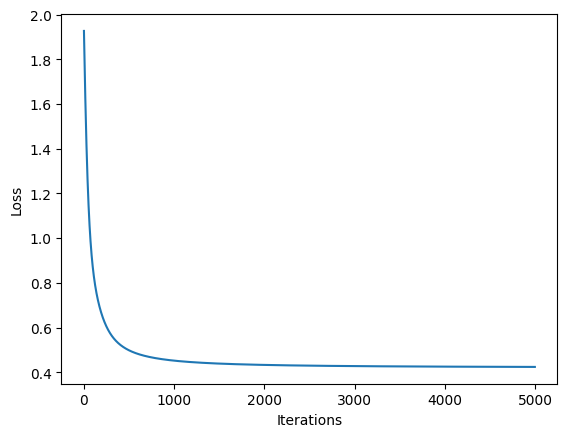

In [47]:
# SHOW THE LOSS CURVE
model.show_loss_curve()

In [48]:
# COMPUTE ACCURACY

from sklearn.metrics import accuracy_score

y_predicted = model.predict(X_train)
accuracy = accuracy_score(y_train, y_predicted)

# This accuracy is a good result on Titanic dataset. You can compare it with the models from the demonstrations of the ML book in this repository.
print("Accuracy:", accuracy)

Accuracy: 0.8159371492704826
